In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import os, ast
import numpy as np
import random
import math
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [35]:
tweets_file = '/content/drive/MyDrive/IR/project/cleaned_tweets.csv'
df_tweets = pd.read_csv(tweets_file, index_col=0)
df_tweets.head()

,Policy Name Variant,Id,Date,Url,Full Text,Hashtags,Views Count,Favourite Count,Retweet Count,Reply Count,Language,Image Urls,Video Urls,User Mentions,User Profile Id,User Description,User Name,User Followers Count
Policy Name,,,,,,,,,,,,,,,,,,
National AIDS Control Organisation (NACO) Internship Programme,National AIDS Control Organisation Internship ...,1759914357943910795,Tue Feb 20 12:14:15 +0000 2024,https://twitter.com/tnsfrbc/status/17599143579...,Stipend INR.8000 | National AIDS Control Organ...,"['tnsfrbc', 'naco', 'internships', 'undergradu...",50,1,1,0,en,[],[],[],1346692616704774146,The Core demand of SFRBC,tnsfrbc,169
National AIDS Control Organisation (NACO) Internship Programme,National AIDS Control Organisation,1781269484575338928,Fri Apr 19 10:31:54 +0000 2024,https://twitter.com/NACOINDIA/status/178126948...,People infected with HIV should take treatment...,"['KnowFacts', 'KnowHIV', 'IndiaFightsHIVandSTI...",91,4,1,0,en,[],['https://video.twimg.com/ext_tw_video/1781269...,['MoHFW_INDIA'],1035019353190621185,This is official twitter account of National A...,NACOINDIA,7760
National AIDS Control Organisation (NACO) Internship Programme,National AIDS Control Organisation,1780904732846075959,Thu Apr 18 10:22:30 +0000 2024,https://twitter.com/NACOINDIA/status/178090473...,"मिथक नहीं, तथ्य फैलाएं।\n\nHIV का संक्रमण साथ ...","['KnowFacts', 'KnowHIV', 'IndiaFightsHIVandSTI...",162,6,2,0,hi,['https://pbs.twimg.com/media/GLcLZ1UaMAAAEPM....,[],['MoHFW_INDIA'],1035019353190621185,This is official twitter account of National A...,NACOINDIA,7760
National AIDS Control Organisation (NACO) Internship Programme,National AIDS Control Organisation,1780189621395292185,Tue Apr 16 11:00:54 +0000 2024,https://twitter.com/NACOINDIA/status/178018962...,Condoms offer three layers of protection:\n1. ...,"['KnowFacts', 'KnowHIV', 'IndiaFightsHIVandSTI...",187,12,2,0,en,['https://pbs.twimg.com/media/GLSA574aAAAZ_6z....,[],['MoHFW_INDIA'],1035019353190621185,This is official twitter account of National A...,NACOINDIA,7760
National AIDS Control Organisation (NACO) Internship Programme,National AIDS Control Organisation,1779914215429685485,Mon Apr 15 16:46:32 +0000 2024,https://twitter.com/StigmabaseO/status/1779914...,HIV Fighting Stigma} Red Ribbon Express: Missi...,[],8,0,0,0,en,[],[],[],138418838,North & South America — Australia & NZ — HIV A...,StigmabaseO,4178


In [36]:
quora_file = '/content/drive/MyDrive/IR/project/quora_posts.csv'
df_quora = pd.read_csv(quora_file, index_col=0)
df_quora.head()

,Date,Url,Title,Full Text,Type,Upvotes Count,Views Count,Shares Count,Comments Count,Image Urls,Video Urls,User Id,User name
Id,,,,,,,,,,,,,
80644619,2018-04-22T14:22:30.637110Z,https://www.quora.com/What-are-some-prominent-...,What are some prominent examples of Indian bra...,"Brain Drain Brain Drain is a economic term, wh...",answer,1,3091,0,0,['https://qph.cf2.quoracdn.net/main-qimg-aa368...,[],168640941,MayurDhokchaule
1477743656698452,2023-04-04T05:20:01.164844Z,https://www.quora.com/What-are-some-fellowship...,What are some fellowships for research availab...,1. Khorana Program for Scholars 2. Fulbright F...,answer,0,49,0,0,[],[],233280385,The Google Bot
8309576,2020-09-23T09:42:45.997903Z,https://generalknowledgelive.quora.com/Schemes...,Schemes for Indian researchers residing in for...,Schemes for Indian researchers residing in for...,post,0,958,2,0,[],[],1292556795,ShivPrasad
137017811,2023-11-26T08:03:07.711494Z,https://azeezunv.quora.com/The-significance-of...,The significance of Fellowships in research an...,The significance of Fellowships in research an...,post,0,15,0,0,['https://qph.cf2.quoracdn.net/main-qimg-2168b...,[],506976693,Azeez


# **Plots**

In [32]:
import matplotlib.pyplot as plt

In [41]:
df_tweets['Retweet Count'].unique()

array([   1,    2,    0,    4,    8,   21,    3,    5,    6,   14,    7,
         10,   11,   24,    9,   20,   16,   15,   74,  127, 3190, 2151,
         30,   23,   25,   12,   36,   32,   27,  147,  142,   17,   51,
         49,   78,   37,   13,  600,   34, 3207,   28,  253,   62,   89,
         57,   77,   33,  161,   94,  247,  381,   19,   38, 2092,   96,
         18, 2737,  331,   65,  492,   41,  339,  177,  168,  132,  219,
        249,   43,  100,   29,   26,  257,  153,   59, 1410,  173,  382,
         97,  254, 2753,   63,   66,  493,  169,  301,   48,  532,   91,
         22,   39,   72,   47, 2093])

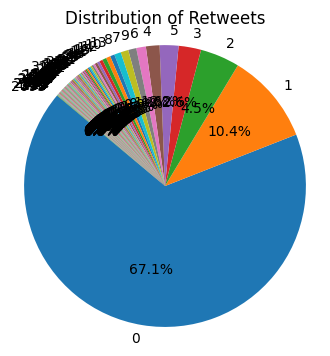

In [37]:
type_counts = df_tweets['Retweet Count'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Retweets')
plt.axis('equal')
plt.show()

In [42]:
df_tweets['Reply Count'].unique()

array([  0,   1,   6,   5,   4,   2,   3,   7,  73,  15,  14, 101,  21,
         8,   9, 311,  12,  65,  74,  28,  40,  47,  30,  26,  70,  68,
       156,  35, 171,  22,  55,  50,  33,  25,  17,  69,  36,  23,  29,
        18,  10,  11,  24])

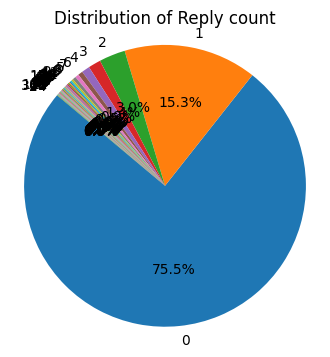

In [46]:
type_counts = df_tweets['Reply Count'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reply count')
plt.axis('equal')
plt.show()

# **Preprocessing**

In [27]:
import csv

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    print('\n')
    print("Original Text:", text)

    # Lowercasing
    text = text.lower()
    print("Lower Text:", text)

    # Tokenization
    tokens = word_tokenize(text)
    print("Tokenized Text:", tokens)

    # Removing punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    print("Text without Punctuation:", tokens)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    print("Text without Stopwords:", tokens)

    # Stemming
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    print("Stemmed Text:", tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    print("Lemmatized Text:", tokens)

    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# Get the Full Text
text = df_tweets['Full Text'].tolist()

# Preprocess the Full Text
preprocessed_tweets = [preprocess_text(text) for text in text]

Streaming output truncated to the last 5000 lines.
Text without Stopwords: ['', 'mryadav', '', 'kumarrk45', '', 'telugu360', 'house', 'registration', 'indi', 'recent', 'gane', 'papers', 'icharu', 'houses', 'ki', 'kuda', 'anni', 'rights', 'unnay', 'people', 'ki', 'certificates', 'fee', 'reimbursement', 'padaledu', 'mem', 'kattukoni', 'techa', 'anna', 'godavalu', 'avthay', 'ani', 'law', 'order', 'issues', 'chesi', 'action', 'tisukontaru', 'anna', 'pension', 'ivvaledu', 'analedu', 'kani', 'cheppina', 'mata']
Stemmed Text: ['', 'mryadav', '', 'kumarrk45', '', 'telugu360', 'hous', 'registr', 'indi', 'recent', 'gane', 'paper', 'icharu', 'hous', 'ki', 'kuda', 'anni', 'right', 'unnay', 'peopl', 'ki', 'certif', 'fee', 'reimburs', 'padaledu', 'mem', 'kattukoni', 'techa', 'anna', 'godavalu', 'avthay', 'ani', 'law', 'order', 'issu', 'chesi', 'action', 'tisukontaru', 'anna', 'pension', 'ivvaledu', 'analedu', 'kani', 'cheppina', 'mata']
Lemmatized Text: ['', 'mryadav', '', 'kumarrk45', '', 'telugu36

In [ ]:
# Get the Full Text
text = df_quora['Full Text'].tolist()

# Preprocess the Full Text
preprocessed_quora = [preprocess_text(text) for text in text]



Original Text: Brain Drain Brain Drain is a economic term, where educated people of any country working in another country coming back to work in their home country . Over 1,000 Indian scientists working abroad have returned to India in the last two-three years, said Ministry for Science & Technology and Earth Sciences According to Department of Science &Tech, number of Indian scientist working internationally &returning to India showed 70 percent jump between 2012 &2017. Example- Shahrukh Khan In Swadesh Movie. Reasons for Brain Gain: - This has been primarily due to schemes such as Ramanujan Fellowship Scheme, Innovation in Science Pursuit for Inspired Research (INSPIRE) Faculty Scheme and the Ramalingaswami re-entry fellowship scheme. The launch of IPR Policy in 2016 has set a pace to resolve the IPR issues related to R&D in India. India is rapidly becoming a global design and developmental hub. Thousands of companies from around world have set up their R&D centres in India. Chang

# **Analysis**

In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [20]:
!pip install textblob
!pip install tensorflow keras

In [22]:
!pip install transformers torch

In [13]:
from transformers import pipeline

# Load sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

def get_sentiment(text):
    # Split text into chunks of 512 characters
    n = 512
    chunks = [text[i:i+n] for i in range(0, len(text), n)]
    sentiments = [classifier(chunk)[0] for chunk in chunks]
    # Average sentiment scores (simple majority vote)
    positive_count = sum(1 for sentiment in sentiments if sentiment['label'] == 'POSITIVE')
    return 1 if positive_count > len(sentiments) / 2 else 0

# Create sentiment column
#df_quora['sentiment_transformer'] = df_quora['Full Text'].apply(get_sentiment)
df_tweets['sentiment_transformer'] = df_tweets['Full Text'].apply(get_sentiment)

In [29]:
# Function to predict sentiment using Transformers pipeline
def get_sentiment_transformer(text):
    # Split text into chunks of 512 characters
    n = 512
    chunks = [text[i:i+n] for i in range(0, len(text), n)]
    sentiments = [classifier(chunk)[0] for chunk in chunks]
    # Average sentiment scores (simple majority vote)
    positive_count = sum(1 for sentiment in sentiments if sentiment['label'] == 'POSITIVE')
    return 2 if positive_count > len(sentiments) / 2 else 0

df_tweets['sentiment_transformer'] = df_tweets['Full Text'].apply(get_sentiment_transformer)

In [23]:
from textblob import TextBlob

# Function to apply sentiment analysis
def get_sentiment(text):
    testimonial = TextBlob(text)
    polarity = testimonial.sentiment.polarity
    return 1 if polarity > 0 else 0

# Create sentiment column
#df_quora['sentiment_blob'] = df_quora['Full Text'].apply(get_sentiment)
df_tweets['sentiment_blob'] = df_tweets['Full Text'].apply(get_sentiment)

In [ ]:
print(df_quora)

                                         Date  \
Id                                              
80644619          2018-04-22T14:22:30.637110Z   
1477743656698452  2023-04-04T05:20:01.164844Z   
8309576           2020-09-23T09:42:45.997903Z   
137017811         2023-11-26T08:03:07.711494Z   

                                                                Url  \
Id                                                                    
80644619          https://www.quora.com/What-are-some-prominent-...   
1477743656698452  https://www.quora.com/What-are-some-fellowship...   
8309576           https://generalknowledgelive.quora.com/Schemes...   
137017811         https://azeezunv.quora.com/The-significance-of...   

                                                              Title  \
Id                                                                    
80644619          What are some prominent examples of Indian bra...   
1477743656698452  What are some fellowships for research availab.

In [30]:
print(df_tweets)

                                                                                  Policy Name Variant  \
Policy Name                                                                                             
National AIDS Control Organisation (NACO) Inter...  National AIDS Control Organisation Internship ...   
National AIDS Control Organisation (NACO) Inter...                 National AIDS Control Organisation   
National AIDS Control Organisation (NACO) Inter...                 National AIDS Control Organisation   
National AIDS Control Organisation (NACO) Inter...                 National AIDS Control Organisation   
National AIDS Control Organisation (NACO) Inter...                 National AIDS Control Organisation   
...                                                                                               ...   
Awasiya Vidyala Yojana                                                                        Awasiya   
Awasiya Vidyala Yojana                                 

In [25]:
df_tweets.to_csv('/content/drive/MyDrive/IR/project/tweets_sentBlob.csv', index=False)

In [31]:
df_tweets.to_csv('/content/drive/MyDrive/IR/project/tweets_sentTransformer_1.csv', index=False)